# Import Libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Import Dataset 

In [3]:
df = pd.read_csv("Salary_dataset.csv")

In [4]:
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df['Salary'] = df['Salary'].astype(int)
df['YearsExperience'] =df['YearsExperience'].astype(int)

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head(10)

,YearsExperience,Salary
0,1,39344
1,1,46206
2,1,37732
3,2,43526
4,2,39892
5,3,56643
6,3,60151
7,3,54446
8,3,64446
9,3,57190


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   YearsExperience  30 non-null     int64
 1   Salary           30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


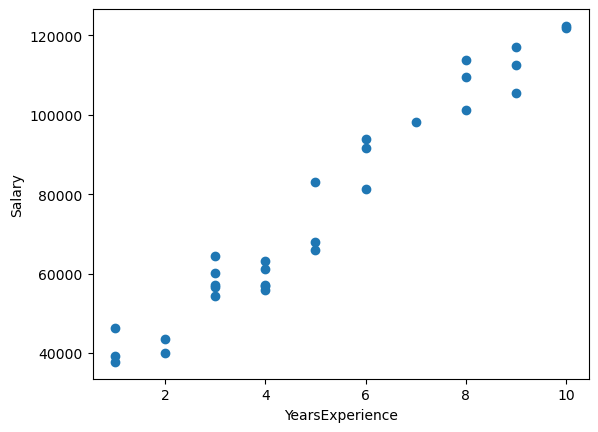

Text(0.5, 1.0, 'Salary vs Years of Exp')

In [9]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
plt.title("Salary vs Years of Exp")  

In [10]:
# Divide dataset into independent and Dependent Variable

X = df[['YearsExperience']]
y = df[['Salary']]

In [11]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42)

In [12]:
X.shape,X_train.shape,X_test.shape

((30, 1), (19, 1), (11, 1))

In [13]:
# Scale the X_train & X_test dataa

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

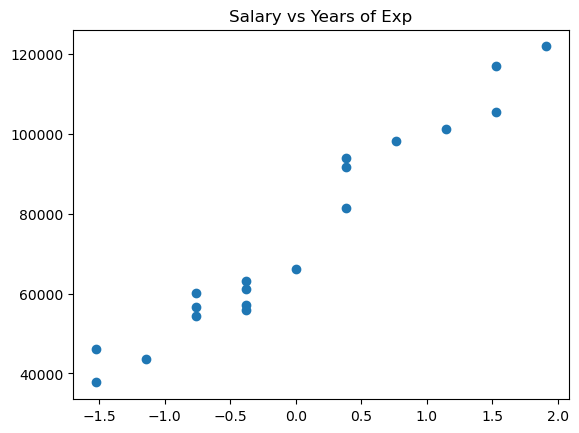

C:\Users\Srujan Kinjawadekar\AppData\Local\Temp\ipykernel_2108\1856816698.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [14]:
plt.scatter(X_train, y_train)
plt.show()
plt.legend()


In [15]:
# Train using liner Regression

from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [16]:
linear.fit(X_train, y_train)


LinearRegression()

In [17]:
print("The slope or coefficient of weight is ",linear.coef_)
print("Intercept:", linear.intercept_)

The slope or coefficient of weight is  [[24569.05927223]]
Intercept: [74367.84210526]


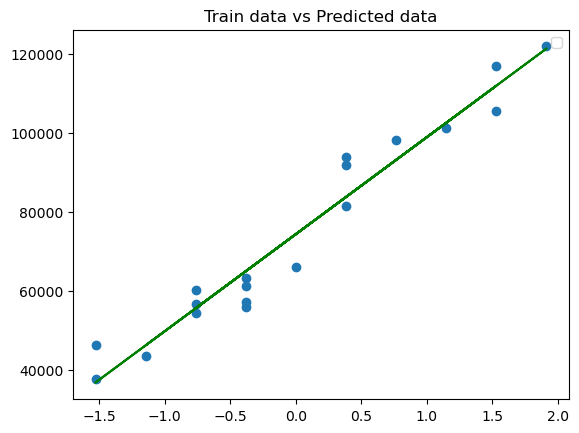

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train, linear.predict(X_train),'g')
plt.title("Train data vs Predicted data")
plt.show()

# Create predicted Data

In [19]:
y_pred_test = linear.predict(X_test)


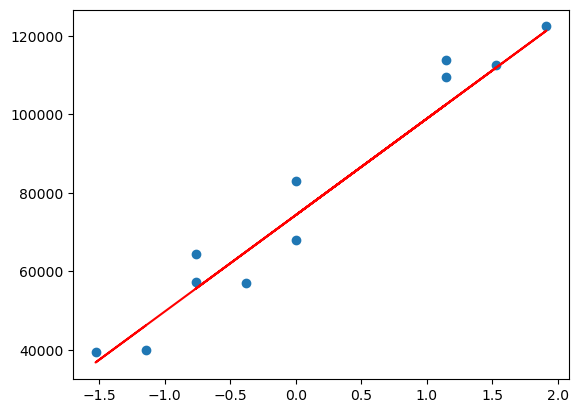

Text(0.5, 1.0, 'Test data vs Predicted Test data')

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test,linear.predict(X_test),'r')
plt.show()
plt.title("Test data vs Predicted Test data")

# Performance Matrices 
# MSE, RSME , MAE & R2 Score.

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred_test)
mae =mean_absolute_error(y_test, y_pred_test)
rmse= np.sqrt(mse)
map= mean_absolute_percentage_error(y_test, y_pred_test)

print("Mean Absolute Error:",mae)
print("Mean Absolute percentage error:",round(map * 100,2),"%")
print("Mean Squared Error:", mse)
print("RMSE:", rmse)

Mean Absolute Error: 5672.120721383878
Mean Absolute percentage error: 8.23 %
Mean Squared Error: 44084203.47701308
RMSE: 6639.593622881831


# R Squared & Adjusted Rsquared Value

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print("R2 Score:",score)

R2 Score: 0.949309563628255


In [24]:
#v Adjusted R2 score:

adj_score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score:",adj_score)

Adjusted R2 Score: 0.9436772929202834


# Predict the with new Test data

In [25]:
scaled_salary = scaler.transform([[250000]])
print(scaled_salary)


[[95573.2703409]]


c:\Users\Srujan Kinjawadekar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
reg = linear.predict([scaled_salary[0]])
print(f"Predicted value for the ${scaled_salary} is:", reg ,'years')

Predicted value for the $[[95573.2703409]] is: [[2.34821971e+09]] years
